(2 points) Load the laptop sales data into jupyter notebook and check if it is loaded successfully. (Optional: Observe how pandas handles the variable/column names, as compared to original names in csv file, when data is read. It will be useful to tweak the variable names for your own convenience; e.g. remove spaces.)
(2 points) What is the data type of each of the variable in data? Check using appropriate pandas fields. Hint: dtype or dtypes will do the job for you. Had you expected exactly the same data types as shown by pandas? Comment. Convert to more appropriate types (e.g. datetime, category).
(2 points) Are there any missing values in the data? Report the findings.
(2 points) Observe the missing values graphically and comment on it. (Hint: use heatmap)
(3 points) At what average and median price do the laptops sell? Hint: Use distribution of values to answer this question.
(4 points) Compare retail prices across stores. Do prices vary across the stores? Which stores look costly in general?
(2 points) Does price of laptop vary according to integrated wireless?
(6 points) Draw the scatter plot of retail prices versus
Screen Size
Battery Life
RAM
Processor
HD Size
Configuration
Comment on the utility of these scatter plots.
(5 points) In your opinion, which of the configurations make the biggest difference in the laptop price?

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import datetime as dt
import seaborn as sns
#load data and check success
DATA = Path('.').resolve().parent / 'data'
laptop_df = pd.read_csv(DATA/"LaptopSales.csv")
laptop_df.columns = [s.strip().replace(' ', '_').replace('?', '').replace('(','').replace(')','') for s in laptop_df.columns]
laptop_df.dtypes
print(laptop_df.head())
print(laptop_df.shape)
laptop_df.columns

            Date  Configuration Customer_Postcode Store_Postcode  \
0  1/1/2008 0:01            163          EC4V 5BH        SE1 2BN   
1  1/1/2008 0:02            320           SW4 0JL       SW12 9HD   
2  1/1/2008 0:04             23          EC3V 1LR         E2 0RY   
3  1/1/2008 0:04            169          SW1P 3AU        SE1 2BN   
4  1/1/2008 0:06            365          EC4V 4EG       SW1V 4QQ   

   Retail_Price  Screen_Size_Inches  Battery_Life_Hours  RAM_GB  \
0         455.0                  15                   5       1   
1         545.0                  15                   6       1   
2         515.0                  15                   4       1   
3         395.0                  15                   5       1   
4         585.0                  15                   6       2   

   Processor_Speeds_GHz Integrated_Wireless  HD_Size_GB Bundled_Applications  \
0                   2.0                 Yes          80                  Yes   
1                   2.0     

Index(['Date', 'Configuration', 'Customer_Postcode', 'Store_Postcode',
       'Retail_Price', 'Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB',
       'Processor_Speeds_GHz', 'Integrated_Wireless', 'HD_Size_GB',
       'Bundled_Applications', 'customer_X', 'customer_Y', 'store_X',
       'store_Y'],
      dtype='object')

In [2]:
#check data types, convert corresponding datetime and category types
laptop_df.Integrated_Wireless = laptop_df.Integrated_Wireless.astype('category')
laptop_df.Bundled_Applications = laptop_df.Bundled_Applications.astype('category')
laptop_df['Date'] =  pd.to_datetime(laptop_df['Date'], format='%m/%d/%Y %H:%M')
laptop_df.dtypes

Date                    datetime64[ns]
Configuration                    int64
Customer_Postcode               object
Store_Postcode                  object
Retail_Price                   float64
Screen_Size_Inches               int64
Battery_Life_Hours               int64
RAM_GB                           int64
Processor_Speeds_GHz           float64
Integrated_Wireless           category
HD_Size_GB                       int64
Bundled_Applications          category
customer_X                       int64
customer_Y                       int64
store_X                        float64
store_Y                        float64
dtype: object

number of missing values for each columns as follows:
Date 208
Configuration 0
Customer_Postcode 0
Store_Postcode 0
Retail_Price 13443
Screen_Size_Inches 0
Battery_Life_Hours 0
RAM_GB 0
Processor_Speeds_GHz 0
Integrated_Wireless 0
HD_Size_GB 0
Bundled_Applications 0
customer_X 0
customer_Y 0
store_X 148
store_Y 148


C:\Jenny\DataScience\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[  208.     0.     0.     0. 13443.     0.     0.     0.     0.     0.
     0.     0.     0.     0.   148.   148.]


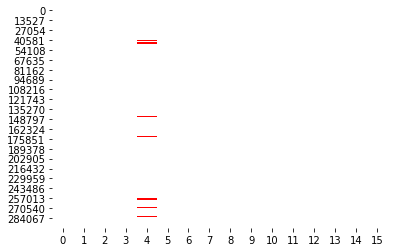

In [3]:
#report missing data for each column
print("number of missing values for each columns as follows:")
for col in laptop_df.columns:
    print(col,laptop_df.shape[0] - laptop_df[col].count())
laptop_df.where(laptop_df.isnull(), np.nan)
naInfo = np.zeros(laptop_df.shape)
naInfo[laptop_df.isna().as_matrix()] = 1
print(naInfo.sum(axis = 0))
#comments: use heatmap to show the missing data and Retail_Price column has most missing data
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False)

In [4]:
#what average and median price do the laptops sell
print("Median retail price = ", laptop_df.Retail_Price.median())
print("Average retail price = ", laptop_df.Retail_Price.mean())
laptop_df.Retail_Price.describe()

Median retail price =  500.0
Average retail price =  508.12593575453405


count    284129.000000
mean        508.125936
std         104.611789
min         168.000000
25%         440.000000
50%         500.000000
75%         575.000000
max         890.000000
Name: Retail_Price, dtype: float64

The following store looks costly in general
store_X              533788.000000
store_Y              189994.000000
Mean_Retail_Price       522.943285
Name: 10, dtype: float64


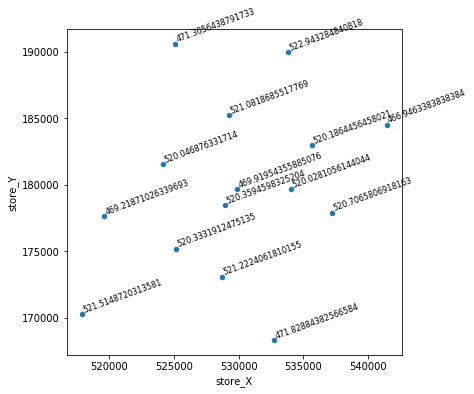

In [5]:
#Compare retail prices across stores. Do prices vary across the stores?
dataForPlot_df = laptop_df.groupby(['store_X', 'store_Y']).mean().Retail_Price

dataForPlot_df = pd.DataFrame(dataForPlot_df.reset_index())
dataForPlot_df.rename(columns = {'Retail_Price':'Mean_Retail_Price'}, inplace=True)
print("The following store looks costly in general")
print(dataForPlot_df.loc[dataForPlot_df['Mean_Retail_Price'].idxmax()])
ax = dataForPlot_df.plot.scatter(x='store_X', y='store_Y', figsize=(6,6))
points = dataForPlot_df[['store_X', 'store_Y', 'Mean_Retail_Price']]
_=points.apply(lambda x: ax.text(*x, rotation=20, fontsize=8, horizontalalignment='left', verticalalignment='bottom'), axis=1)

#comments: yes, From the scatter plot, mean price does vary accross the stores

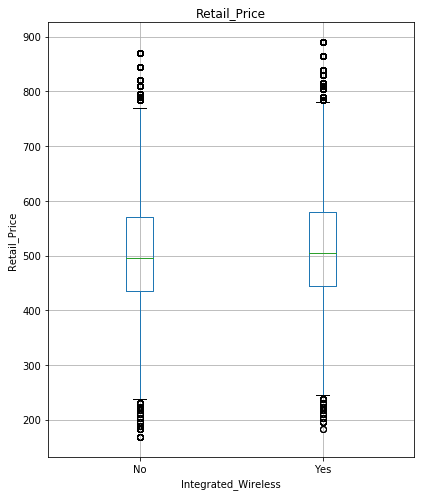

In [6]:
#Does price of laptop vary according to integrated wireless?
fig,ax = plt.subplots(figsize=(6,7))
ax = laptop_df.boxplot(column='Retail_Price', by='Integrated_Wireless', ax = ax)
ax.set_ylabel('Retail_Price')
ax.get_figure().suptitle('')
plt.tight_layout()
plt.show()
#comments: it seems integrated wireless =yes group has bit higher mean price

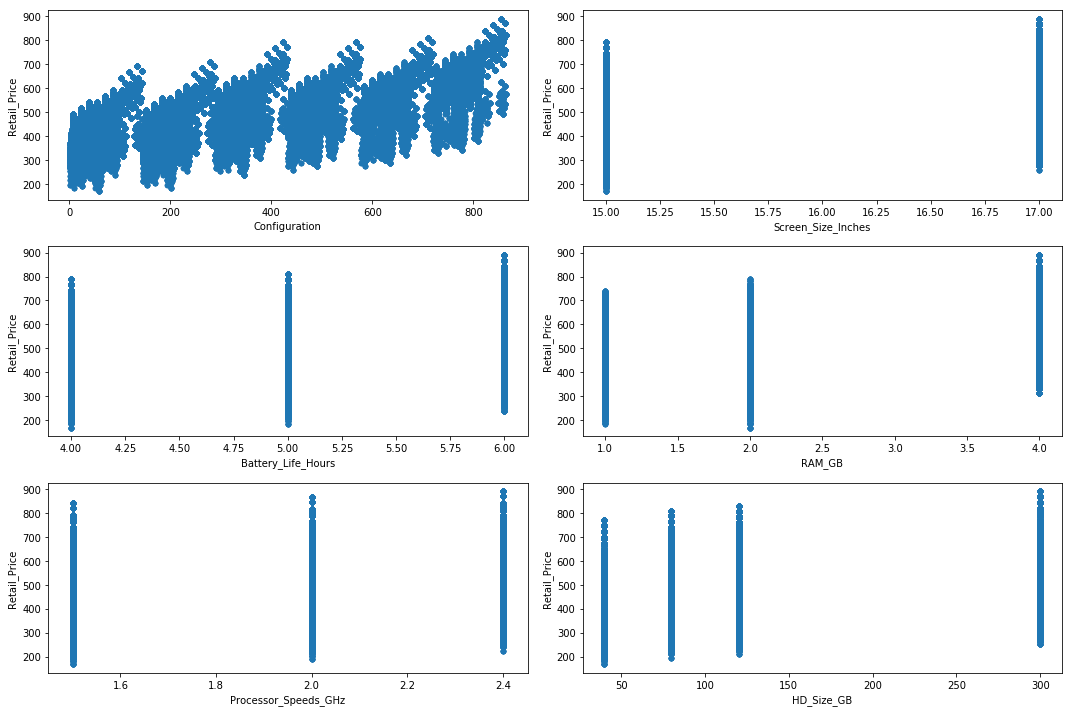

0.5538056149994585 0.38730667848467737 0.23089981118349684 0.4911647266703092 0.19297251769342813 0.24711479723978316


In [7]:
#scatter plot of retail prices versus Screen Size Battery Life RAM Processor HD Size Configuration
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(15,10))

laptop_df.plot.scatter(x = 'Configuration', y = 'Retail_Price', ax=axes[0][0])
laptop_df.plot.scatter(x = 'Screen_Size_Inches', y = 'Retail_Price', ax=axes[0][1])
laptop_df.plot.scatter(x = 'Battery_Life_Hours', y = 'Retail_Price', ax=axes[1][0])
laptop_df.plot.scatter(x = 'RAM_GB', y = 'Retail_Price', ax=axes[1][1] )
laptop_df.plot.scatter(x = 'Processor_Speeds_GHz', y = 'Retail_Price', ax=axes[2][0])
laptop_df.plot.scatter(x = 'HD_Size_GB', y = 'Retail_Price', ax=axes[2][1] )

plt.tight_layout()
plt.show()
#comments:
#We can see from the scatter plot, retail_price is grouped by different configuration, screen size, 
#batterry life hours, Ram, process speed and HD
#And also each group median price is increasing according to group advancing

#comments: from the plot, it seems Configuration makes the biggest difference in the laptop price, 
#We can also check the correlation between Retail_Price and all the different configurations.
print(
laptop_df.Retail_Price.corr(laptop_df.Configuration),
laptop_df.Retail_Price.corr(laptop_df.Screen_Size_Inches),
laptop_df.Retail_Price.corr(laptop_df.Battery_Life_Hours),
laptop_df.Retail_Price.corr(laptop_df.RAM_GB),
laptop_df.Retail_Price.corr(laptop_df.Processor_Speeds_GHz),
laptop_df.Retail_Price.corr(laptop_df.HD_Size_GB)
)